In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaus(x0, xi, tau):
    return np.exp(-(x0 - xi)**2 / (2 * tau**2))

In [3]:
def lwr(x, y, x0, tau):
    m = len(x)
    X = np.vstack((np.ones(m), x)).T
    weights = np.diag([gaus (x0 , xi, tau) for xi in x])
    beta = np.linalg. inv(X.T @ weights @ X) @ X.T @ weights @ y
    return np.dot(np.array([1, x0]), beta)

In [4]:
np.random.seed(42)
x = np.linspace ( -3, 3, 100)
y= np.sin(x) + 0.2 * np.random.randn(100)

In [5]:
tau = 0.5

In [6]:
x_fit = np.linspace(-3, 3, 200)


In [7]:
y_fit = np.array([lwr(x, y, xi, tau) for xi in x_fit])

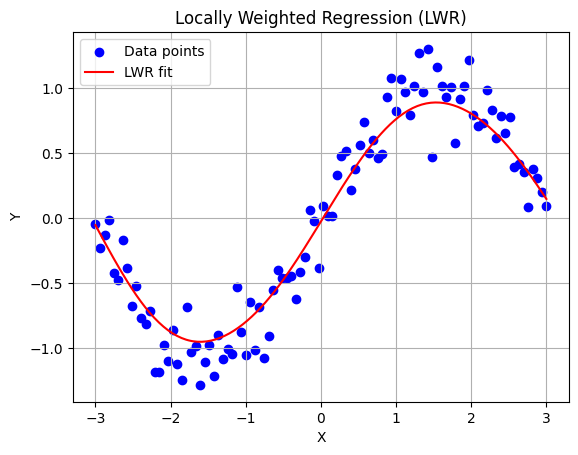

In [8]:
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_fit, y_fit, color='red', label='LWR fit')
plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()